In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [90]:
df = pd.read_csv('C:/Users/shawx/OneDrive/Desktop/implementation/data/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [91]:
df.shape

(7728394, 46)

In [92]:
## Checking Missing Values.
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [93]:
## Checking Duplicates Values.
df.duplicated().sum()

np.int64(0)

In [94]:
## Dropping Irrelevant Features.
columns_to_drop = [
    'ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng', 'Description',
    'Street', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
    'Weather_Timestamp', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
    'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
    'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.head(2)

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain
1,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain


In [95]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'],
      dtype='object')

In [96]:
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown').str.strip()
df['City'] = df['City'].fillna('Unknown').str.strip()
df['State'] = df['State'].fillna('Unknown').str.strip()

In [98]:
## Data Cleaning.
df.drop_duplicates(inplace=True)
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [99]:
## Extract Time Fatures.
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month
df['Month_Name'] = df['Start_Time'].dt.month_name()
df['Year'] = df['Start_Time'].dt.year

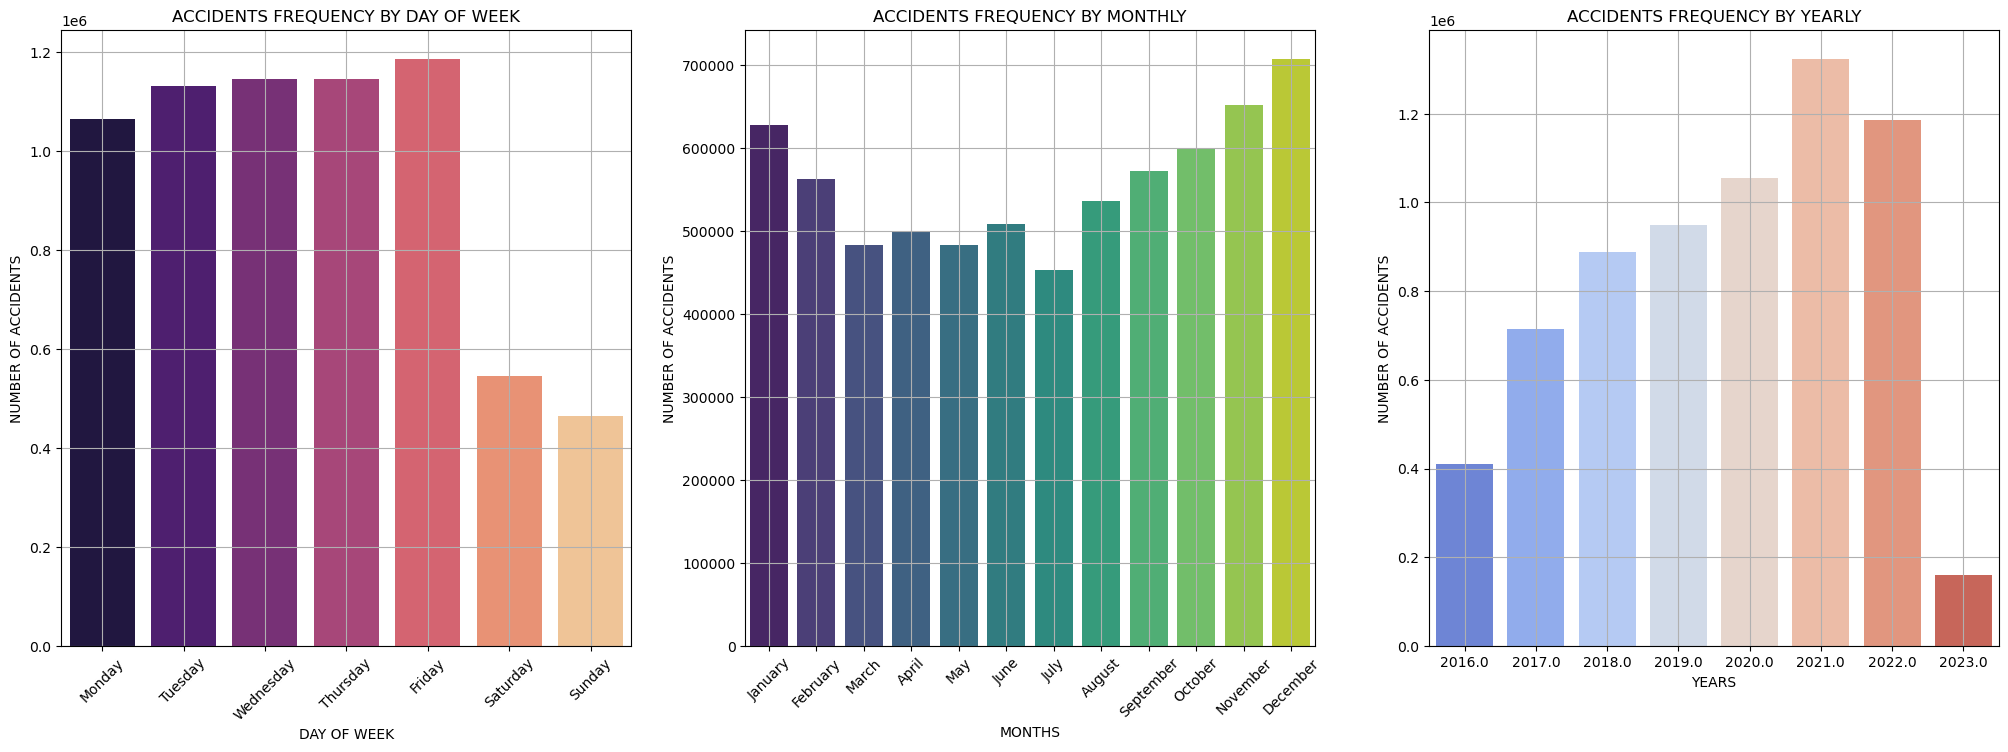

In [100]:
## Visualization of Accidents by Daily, Monthly and Yearly.
plt.figure(figsize=(25,8))

plt.subplot(131)
sns.countplot(x='DayOfWeek', data=df, palette='magma')
plt.xlabel('DAY OF WEEK')
plt.xticks(rotation=45)
plt.ylabel('NUMBER OF ACCIDENTS')
plt.title('ACCIDENTS FREQUENCY BY DAY OF WEEK')
plt.grid()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

plt.subplot(132)
sns.countplot(x='Month_Name', data=df, palette='viridis', order=month_order)
plt.xlabel('MONTHS')
plt.xticks(rotation=45)
plt.ylabel('NUMBER OF ACCIDENTS')
plt.title('ACCIDENTS FREQUENCY BY MONTHLY')
plt.grid()

plt.subplot(133)
sns.countplot(x='Year', data=df, palette='coolwarm')
plt.xlabel('YEARS')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.title('ACCIDENTS FREQUENCY BY YEARLY')
plt.grid()

plt.show()

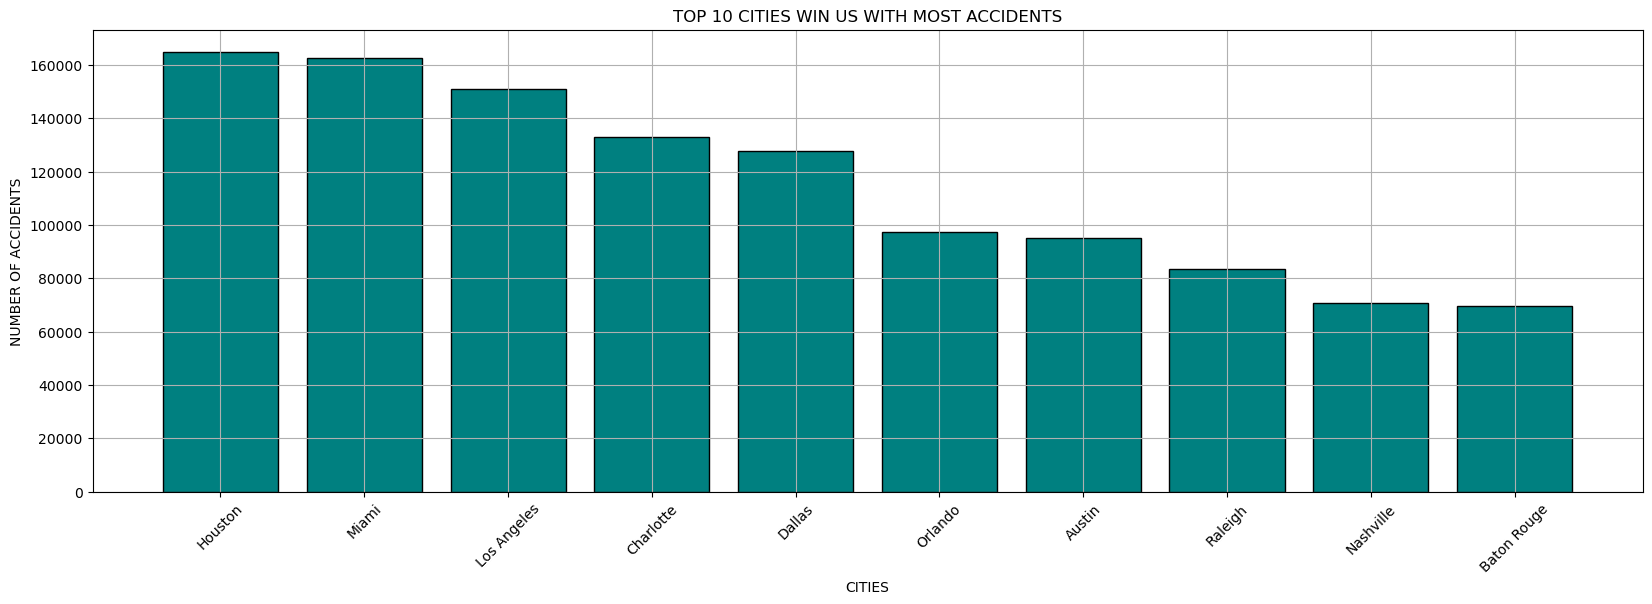

In [101]:
## Top 10 Cities of US which has the most Accidents.
top10_city = df['City'].value_counts().head(10)

plt.figure(figsize=(20,6))
plt.bar(top10_city.index, top10_city.values, color='teal', edgecolor='black')
plt.xlabel('CITIES')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.title('TOP 10 CITIES WIN US WITH MOST ACCIDENTS')
plt.grid()
plt.xticks(rotation=45)
plt.show()

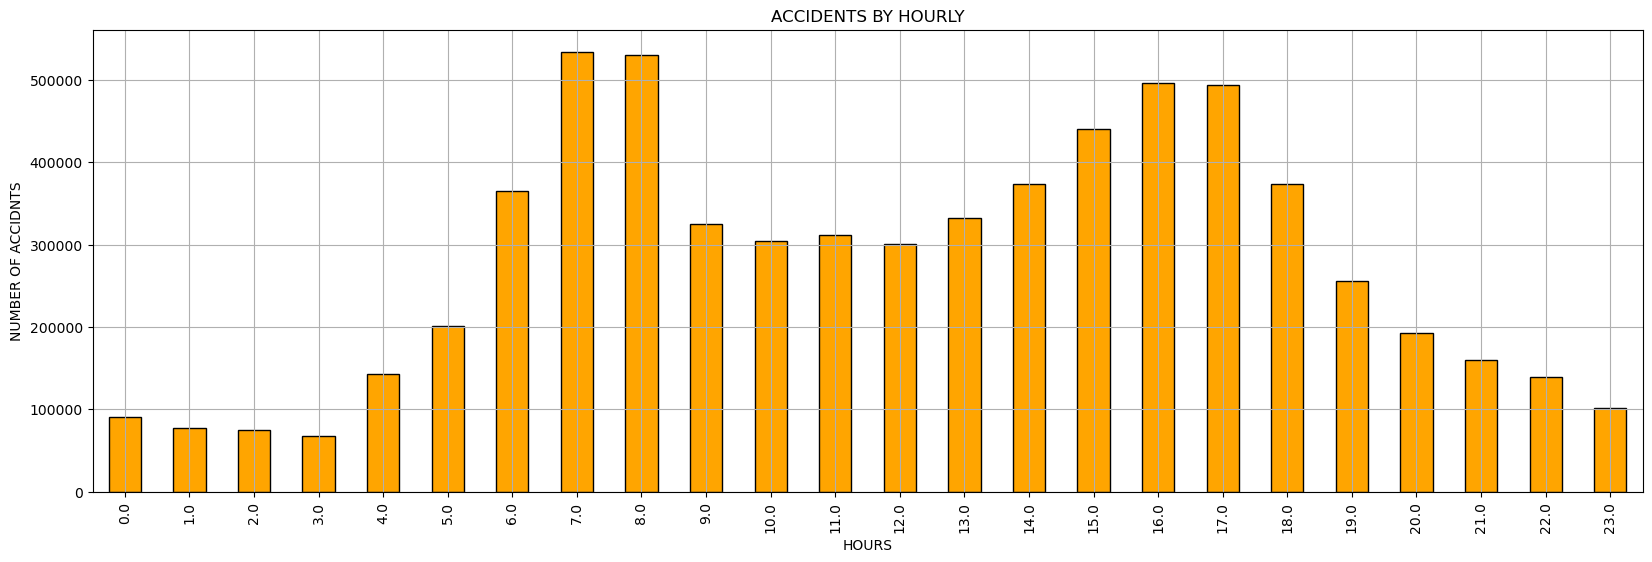

In [102]:
accidents_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(20,6))
accidents_by_hour.plot(kind='bar', color='orange', edgecolor='black' )
plt.title('ACCIDENTS BY HOURLY')
plt.xlabel('HOURS')
plt.ylabel('NUMBER OF ACCIDNTS')
plt.grid()
plt.show()

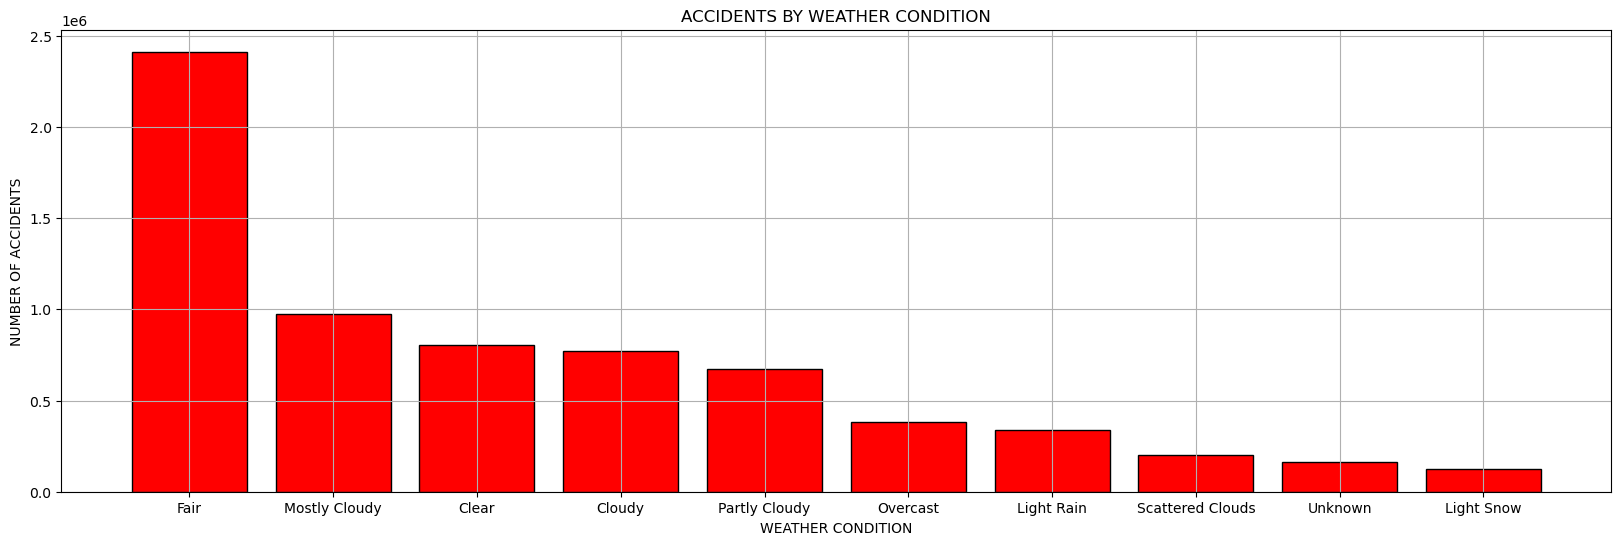

In [103]:
accidents_by_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(20,6))
plt.bar(accidents_by_weather.index, accidents_by_weather.values, color='red', edgecolor='black')
plt.title('ACCIDENTS BY WEATHER CONDITION')
plt.xlabel('WEATHER CONDITION')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.grid()
plt.show()

In [114]:
def categorize_road_condition(condition):
    condition = str(condition).lower()
    if any(x in condition for x in ['wet', 'rain', 'drizzle', 'showers']):
        return 'Wet'
    elif 'dry' in condition:
        return 'Dry'
    elif any(x in condition for x in ['snow', 'ice', 'freezing', 'sleet', 'blizzard', 'hail']):
        return 'Icy/Snow'
    elif any(x in condition for x in ['fog', 'mist', 'haze', 'smoke']):
        return 'Foggy'
    elif any(x in condition for x in ['sand', 'dust']):
        return 'Sand/Dust'
    elif any(x in condition for x in ['storm', 'thunder', 'tornado', 'hurricane', 'hail']):
        return 'Storm'
    elif 'clear' in condition or 'cloud' in condition:
        return 'Clear'
    else:
        return 'Clear'

df['Road_State'] = df['Weather_Condition'].apply(categorize_road_condition)

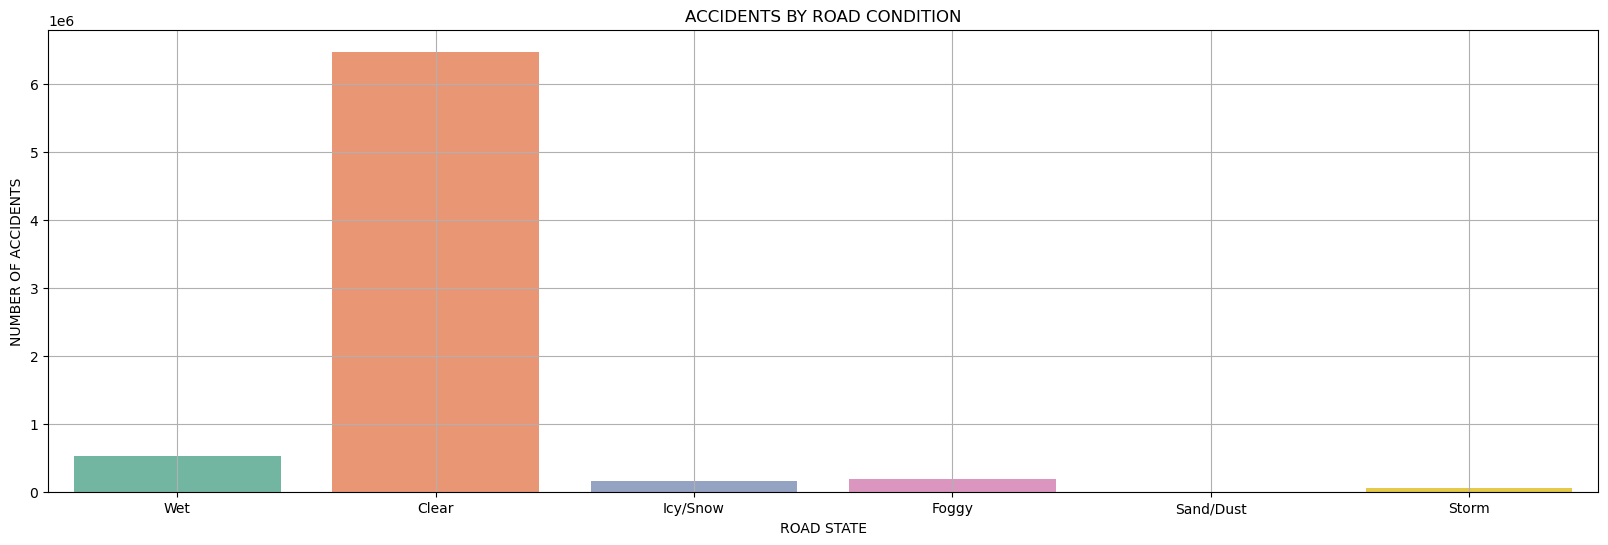

In [115]:
plt.figure(figsize=(20,6))
sns.countplot(x='Road_State', data=df, palette='Set2')
plt.title('ACCIDENTS BY ROAD CONDITION')
plt.xlabel('ROAD STATE')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.grid()
plt.show()